In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("SuperMart_Sales.csv")

In [5]:
df

,Order ID,Order Date,Customer ID,Product,Category,Sub-Category,Sales,Quantity,Discount,Profit,Region,City
0,ORD-1000,2024-01-15,CUST-137,Accessories - Model 8,Technology,Accessories,485.77,9,0.45,62.98,Central,New York
1,ORD-1001,2024-10-27,CUST-277,Chairs - Model 47,Furniture,Chairs,352.91,3,0.10,39.76,East,Houston
2,ORD-1002,2024-04-20,CUST-138,Paper - Model 39,Office Supplies,Paper,350.67,5,0.43,28.78,Central,New York
3,ORD-1003,2024-07-03,CUST-254,Accessories - Model 50,Technology,Accessories,136.98,6,0.40,10.66,West,Chicago
4,ORD-1004,2024-09-07,CUST-118,Binders - Model 30,Office Supplies,Binders,426.34,1,0.21,49.36,South,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORD-1995,2024-05-06,CUST-47,Laptops - Model 22,Technology,Laptops,299.91,6,0.46,34.98,West,Houston
996,ORD-1996,2024-08-15,CUST-189,Laptops - Model 4,Technology,Laptops,39.52,1,0.15,4.28,Central,Chicago
997,ORD-1997,2024-03-16,CUST-247,Phones - Model 24,Technology,Phones,407.67,1,0.35,72.89,West,Chicago
998,ORD-1998,2024-09-16,CUST-84,Pens - Model 8,Office Supplies,Pens,36.21,10,0.38,5.48,East,Chicago


In [10]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
# Check for missing values
print(df.isnull().sum())

Order ID        0
Order Date      0
Customer ID     0
Product         0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Region          0
City            0
dtype: int64


In [12]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [13]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1000 non-null   object        
 1   Order Date    1000 non-null   datetime64[ns]
 2   Customer ID   1000 non-null   object        
 3   Product       1000 non-null   object        
 4   Category      1000 non-null   object        
 5   Sub-Category  1000 non-null   object        
 6   Sales         1000 non-null   float64       
 7   Quantity      1000 non-null   int64         
 8   Discount      1000 non-null   float64       
 9   Profit        1000 non-null   float64       
 10  Region        1000 non-null   object        
 11  City          1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 66.5+ KB
None
                          Order Date        Sales     Quantity     Discount  \
count                       

In [14]:
#Total Revenue and Profit

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Revenue: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")

Total Revenue: $242,454.11
Total Profit: $36,445.79


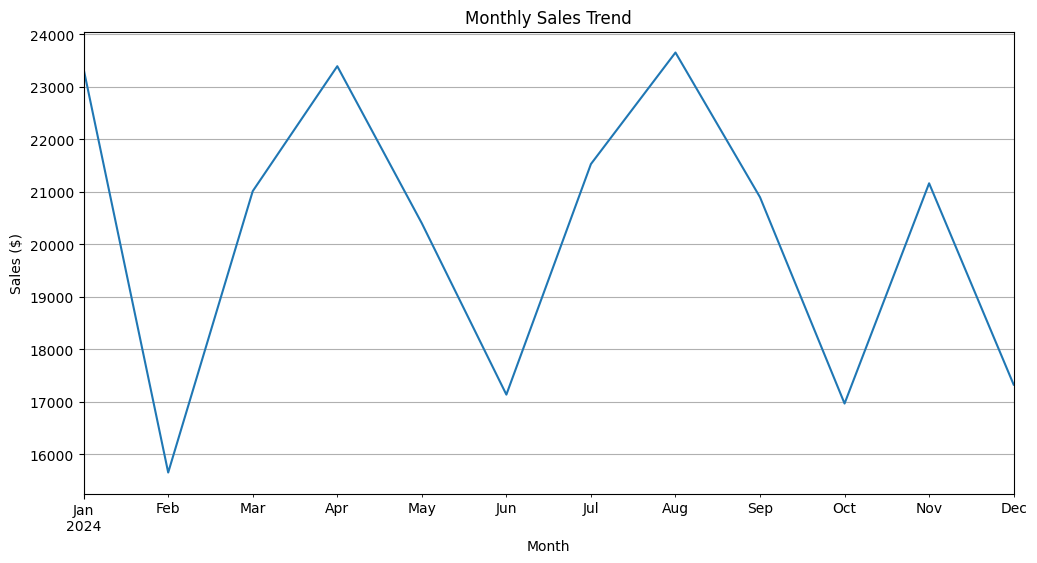

In [15]:
#Monthly Sales Trend

df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), title="Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.grid(True)
plt.show()


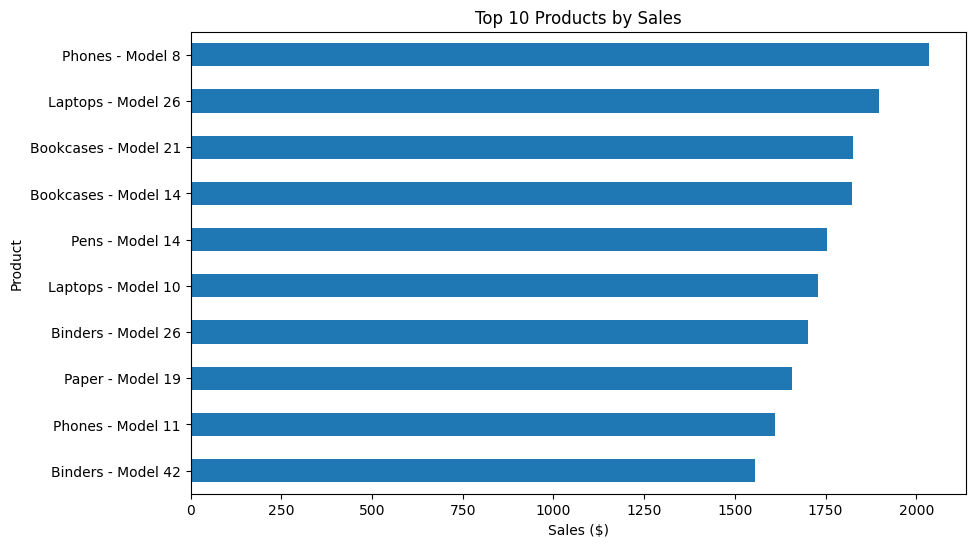

In [16]:
#Top 10 Products by Sales

top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10,6), title="Top 10 Products by Sales")
plt.xlabel("Sales ($)")
plt.gca().invert_yaxis()
plt.show()

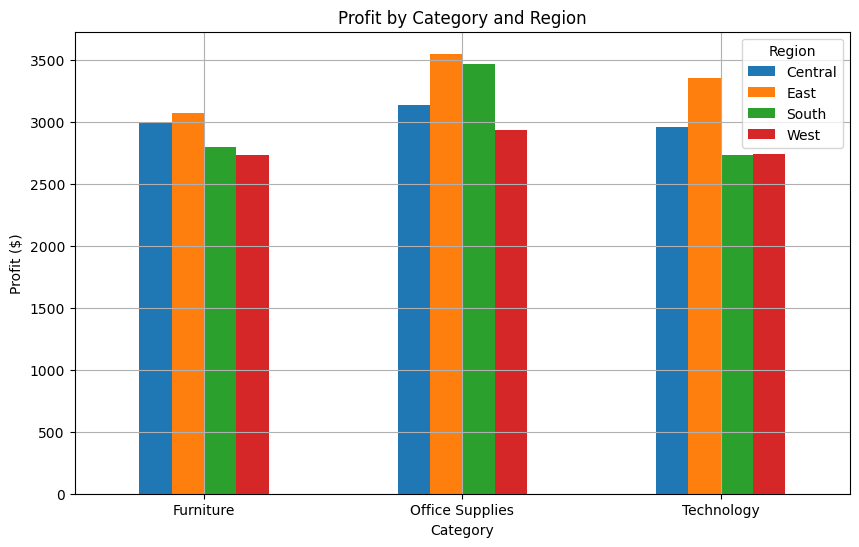

In [17]:
#Profit by Category and Region

category_region_profit = df.groupby(['Category', 'Region'])['Profit'].sum().unstack()

category_region_profit.plot(kind='bar', figsize=(10,6), title="Profit by Category and Region")
plt.ylabel("Profit ($)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

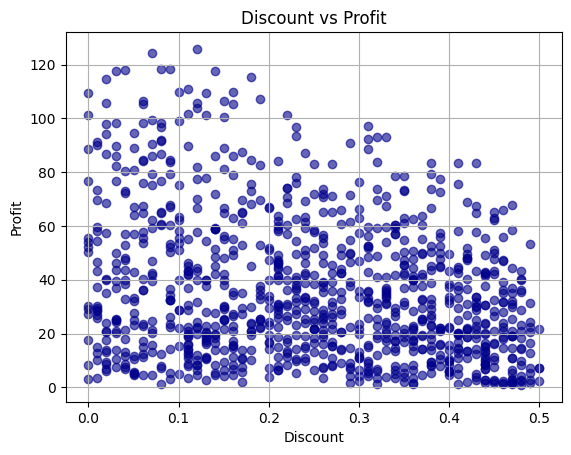

Correlation: -0.26525278476632436


In [10]:
#Discount vs Profit (Correlation)

# Scatter plot Discount vs Profit using matplotlib
plt.scatter(df['Discount'], df['Profit'], color='darkblue', alpha=0.6)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Correlation value using pandas
correlation = df['Discount'].corr(df['Profit'])
print("Correlation:", correlation)
